## Matplotlib Annotations

In [48]:
import pandas as pd
import duckdb

df=pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

df.head(10)

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0
5,Atlanta,Georgia,5,"2,531",11.0,21.0,1,1,50,12,...,67,19.0,4,34,43,10,11,3,NaN,5.0
6,Atlantic City,New Jersey,55,"3,189",3.0,18.0,2,3,37,2,...,119,5.0,6,22,23,8,12,34,NaN,4.0
7,Auburn,New York,0,"5,436",1.0,9.0,1,3,57,1,...,198,2.0,NaN,22,17,15,23,NaN,NaN,5.0
8,Augusta,Georgia,50,995,1.0,2.0,NaN,NaN,14,2,...,22,2.0,2,12,5,NaN,1,1,NaN,2.0
9,Baltimore,Maryland,55,"68,600",19.0,8.0,14,26,"1,356",25,...,594,49.0,23,236,186,12,92,176,12.0,75.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [50]:
df["Total foreign born"]

0       7,127
1      17,718
2      30,216
3       2,991
4       3,301
        ...  
156    12,518
157    37,652
158    14,634
159     1,304
160    12,207
Name: Total foreign born, Length: 161, dtype: object

In [51]:
df["Total foreign born"].iloc[0]

'7,127'

In [52]:
columns=["Sweden","Norway","Finland","Denmark","Total foreign born"]

df_nordic=df[columns]

df_nordic.head()

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,NaN,5,"2,991"
4,32,4,3,5,"3,301"


In [53]:
df_nordic = df_nordic.fillna("0")

In [57]:
for column in columns:
    df[column]= df_nordic[column].str.replace(",","").astype(int)
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,7127,4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,17718,3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,30216,4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,2991,NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,3301,2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [58]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Sweden              161 non-null    int64
 1   Norway              161 non-null    int64
 2   Finland             161 non-null    int64
 3   Denmark             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


In [65]:
df_nordic = duckdb.query (
    """--sql
WITH nordic AS (
 FROM df
         SELECT  state,
             SUM("Total foreign born") AS "Total foreigns",
                SUM(Sweden) AS Swedes,
                SUM(Norway) AS Norwegians,
                SUM(Finland) AS Finnish,
                SUM(Denmark) AS Danish,
             
         GROUP BY 
              state
    
    ) 
              FROM nordic n
              SELECT *, n.swedes + n.norwegians + n.finnish + n.danish AS Nordic

              ORDER BY 
              Nordic
              DESC

""").df()
df_nordic.head(10)


,State,Total foreigns,Swedes,Norwegians,Finnish,Danish,Nordic
0,Illinois,627465.0,57158.0,22300.0,447.0,10374.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,1101.0,2975.0,56147.0
2,New York,1521931.0,29961.0,11752.0,3764.0,6186.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,3154.0,1451.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,405.0,4024.0,14948.0
5,California,160828.0,7223.0,2729.0,986.0,3082.0,14020.0
6,Washington,40868.0,5150.0,3686.0,603.0,1193.0,10632.0
7,Pennsylvania,514506.0,5986.0,861.0,378.0,1210.0,8435.0
8,Nebraska,34456.0,4864.0,457.0,11.0,2888.0,8220.0
9,Connecticut,101502.0,6647.0,273.0,41.0,1144.0,8105.0


In [66]:
df_nordic.shape

(39, 7)

## TODO :
-  more visualizations on Nordic
-  more visualizations on total foreigners
-  ex bar charts for differents states
-  compare nordic to total foreigners

In [68]:
import matplotlib.pyplot as plt

df_nordic.drop(["Total foreigns","Nordic"], axis=1).set_index("State")


,Swedes,Norwegians,Finnish,Danish
State,,,,
Illinois,57158.0,22300.0,447.0,10374.0
Minnesota,34984.0,17087.0,1101.0,2975.0
New York,29961.0,11752.0,3764.0,6186.0
Massachusetts,21971.0,2366.0,3154.0,1451.0
Wisconsin,4034.0,6485.0,405.0,4024.0
California,7223.0,2729.0,986.0,3082.0
Washington,5150.0,3686.0,603.0,1193.0
Pennsylvania,5986.0,861.0,378.0,1210.0
Nebraska,4864.0,457.0,11.0,2888.0


In [76]:
import matplotlib.pyplot as plt

top_3_nordic= (
    df_nordic.drop(["Total foreigns","Nordic"], axis=1).set_index("State").iloc[:3]
    )
top_3_nordic

,Swedes,Norwegians,Finnish,Danish
State,,,,
Illinois,57158.0,22300.0,447.0,10374.0
Minnesota,34984.0,17087.0,1101.0,2975.0
New York,29961.0,11752.0,3764.0,6186.0


(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='State'>)

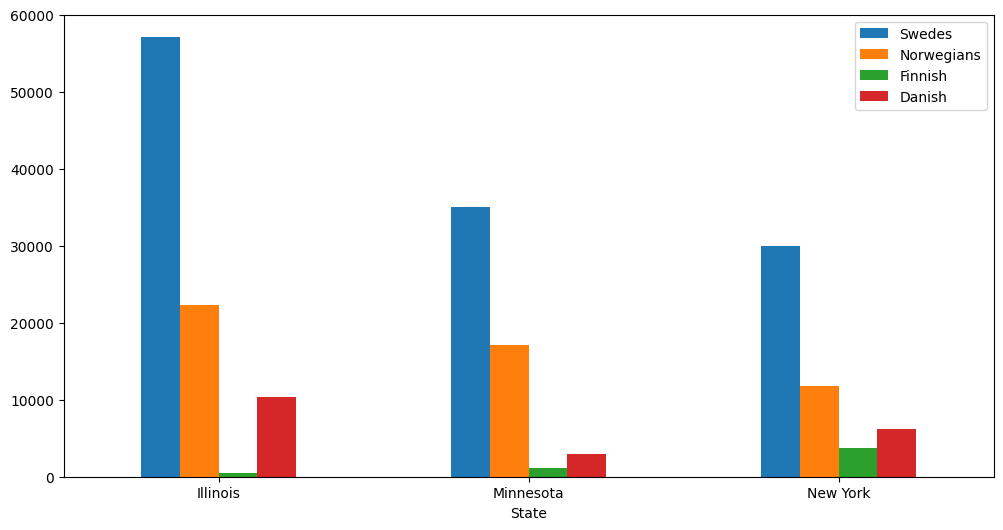

In [82]:
def nordic_plot():
    ax= top_3_nordic.plot(kind="bar",figsize=(12,6))

    ax.set_xticklabels(top_3_nordic.index, rotation=0)

    fig = ax.get_figure()

    return fig, ax

nordic_plot()


[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

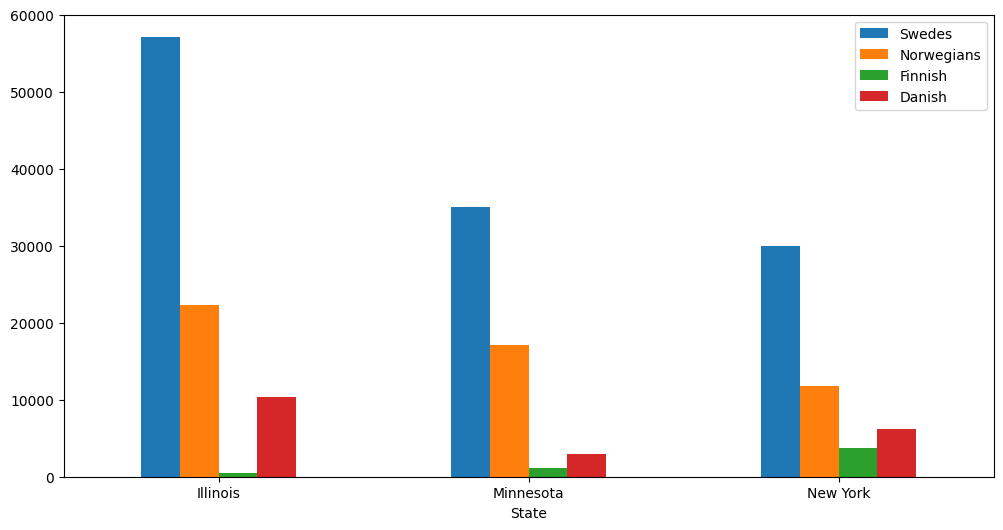

In [84]:
fig, ax = nordic_plot()

ax.containers

In [85]:
ax.containers[0]

<BarContainer object of 3 artists>

In [86]:
ax.containers[0][1].get_height(),ax.containers[0][0].get_x()

(np.float64(34984.0), np.float64(-0.25))

## Annotate

Text(0.8, 43000, 'Swedes')

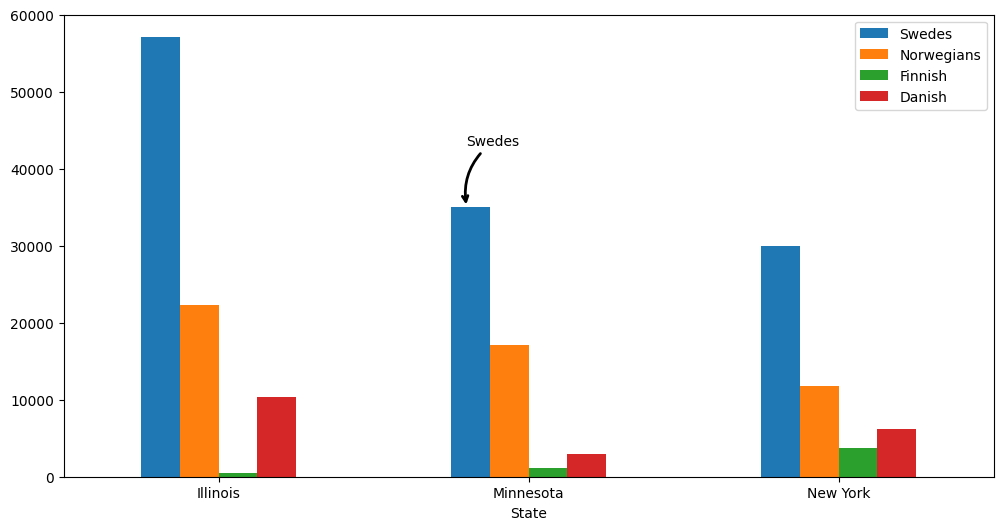

In [105]:
fig, ax = nordic_plot()

arrowrops = dict(arrowstyle="->", color="black", linewidth=2,connectionstyle="arc3, rad= .3")
  
ax.annotate(text= "Swedes", xy=(0.8,35000), arrowprops=arrowrops,xytext=(.8,43000))


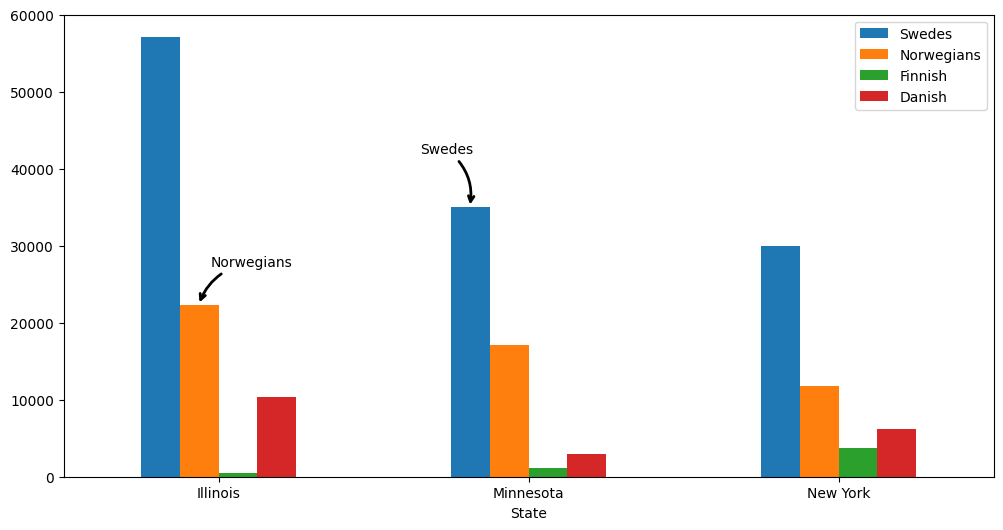

In [107]:
fig, ax = nordic_plot()

# tuple unpacking of ax.containers that is a list of four BarContainers, which contains 3 Artists each
swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers


def annotate_nordic(bar_artist, text, x_offset, y_offset):

    xy = (bar_artist.get_x(), bar_artist.get_height())

    # ternary if statement
    rad = 0.3 if xy[0] < 0 else -0.3

    arrowprops = dict(arrowstyle="->", linewidth=2, connectionstyle=f"arc3, rad={rad}")
    ax.annotate(
        text=text,
        xy=(xy[0] + 0.06, xy[1]),
        arrowprops=arrowprops,
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
    )


annotate_nordic(swede_bars[1], "Swedes", -0.1, 7000)
annotate_nordic(norwegian_bars[0], "Norwegians", 0.1, 5000)

# TODO for reader:
# draw other annotations 
# add labels and title
# remove legend 
# save the figure 